In [9]:
import geopandas as gpd
import numpy as np
import pygmt

# Load Holocene volcano data

source: https://volcano.si.edu/gvp_votw.cfm

In [10]:
server = 'https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?'
query = 'service=WFS&request=GetFeature&typeName=GVP-VOTW:Smithsonian_VOTW_Holocene_Volcanoes&outputFormat=json'

volcanoes = gpd.read_file(server + query)

In [11]:
volcanoes.sort_values('Last_Eruption_Year', ascending=False, inplace=True)

volcanoes.head()

,id,Volcano_Number,Volcano_Name,Primary_Volcano_Type,Last_Eruption_Year,Country,Geological_Summary,Region,Subregion,Latitude,Longitude,Elevation,Tectonic_Setting,Geologic_Epoch,Evidence_Category,Primary_Photo_Link,Primary_Photo_Caption,Primary_Photo_Credit,Major_Rock_Type,geometry
273,Smithsonian_VOTW_Holocene_Volcanoes.fid--4b47d...,255020,Bagana,Lava cone,2024.0,Papua New Guinea,"Bagana volcano, in a remote portion of central...",Southwest Pacific Volcanic Regions,Solomon Volcanic Arc,-6.137,155.196,1855,Subduction zone / Crustal thickness unknown,Holocene,Eruption Observed,https://volcano.si.edu/gallery/photos/GVP-0050...,Plumes rise from a slow-moving andesite lava f...,"Photo by Wally Johnson, 1988 (Australia Bureau...",Andesite / Basaltic Andesite,POINT (155.196 -6.137)
725,Smithsonian_VOTW_Holocene_Volcanoes.fid--4b47d...,311160,Atka Volcanic Complex,Stratovolcano(es),2024.0,United States,The Atka Volcanic Complex consists of a centra...,North America Volcanic Regions,Aleutian Ridge Volcanic Arc,52.331,-174.139,1518,Subduction zone / Intermediate crust (15-25 km),Holocene,Eruption Observed,https://volcano.si.edu/gallery/photos/GVP-1204...,An aerial view from the WNW shows a young vent...,"Photo by Game McGimsey, 2004 (Alaska Volcano O...",Basalt / Picro-Basalt,POINT (-174.139 52.331)
548,Smithsonian_VOTW_Holocene_Volcanoes.fid--4b47d...,284141,Ahyi,Stratovolcano,2024.0,United States,Ahyi seamount is a large conical submarine vol...,Northwest Pacific Volcanic Regions,Mariana Volcanic Arc,20.420,145.030,-75,Subduction zone / Crustal thickness unknown,Holocene,Eruption Dated,https://volcano.si.edu/gallery/photos/GVP-1169...,Ahyi submarine volcano is seen in a bathymetri...,Image courtesy of Susan Merle (Oregon State Un...,Andesite / Basaltic Andesite,POINT (145.03 20.42)
961,Smithsonian_VOTW_Holocene_Volcanoes.fid--4b47d...,344020,San Cristobal,Stratovolcano,2024.0,Nicaragua,"The San Cristóbal volcanic complex, consisting...",Middle America-Caribbean Volcanic Regions,Central America Volcanic Arc,12.702,-87.004,1745,Subduction zone / Continental crust (> 25 km),Holocene,Eruption Observed,https://volcano.si.edu/gallery/photos/GVP-0409...,The San Cristóbal volcanic complex consists of...,Photo by Jaime Incer.,Basalt / Picro-Basalt,POINT (-87.004 12.702)
216,Smithsonian_VOTW_Holocene_Volcanoes.fid--4b47d...,243080,Home Reef,Stratovolcano,2024.0,Tonga,"Home Reef, a submarine volcano midway between ...",Tonga-Kermadec Volcanic Regions,Tofua Volcanic Arc,-18.992,-174.775,-10,Subduction zone / Oceanic crust (< 15 km),Holocene,Eruption Observed,https://volcano.si.edu/gallery/photos/GVP-1195...,A partially eroded pumice cone formed during a...,Photo courtesy of Royal New Zealand Air Force ...,Dacite,POINT (-174.775 -18.992)


# Load plate boundary data

In [12]:
plate_boundaries = gpd.read_file("https://raw.githubusercontent.com/fraxen/tectonicplates/refs/heads/master/GeoJSON/PB2002_boundaries.json")

plate_boundaries.head()

,LAYER,Name,Source,PlateA,PlateB,Type,geometry
0,plate boundary,AF-AN,Mueller et al. [1987],AF,AN,,"LINESTRING (-0.4379 -54.8518, -0.03883 -54.677..."
1,plate boundary,AF-AN,"by Peter Bird, October 2001",AF,AN,,"LINESTRING (7.77235 -54.396, 8.28834 -54.0326,..."
2,plate boundary,AN-AF,Lemaux et al. [2002],AN,AF,,"LINESTRING (32.1258 -46.9998, 31.8654 -47.2011..."
3,plate boundary,SO-AN,Lemaux et al. [2002],SO,AN,,"LINESTRING (32.1258 -46.9998, 33.1739 -47.2644..."
4,plate boundary,SO-AN,Mueller et al. [1987],SO,AN,,"LINESTRING (38.0827 -44.6188, 38.1937 -44.401,..."


# Create figure

## Figure settings

In [13]:
# Choose fonts: to learn more, search gmt.conf on pygmt webpage
pygmt.config(FONT="10p,Times-Roman,black")
pygmt.config(FONT_LABEL="10p,Times-Roman,black")
pygmt.config(FONT_TITLE="10p,Times-Roman,black")
pygmt.config(MAP_TITLE_OFFSET="6.0p")
pygmt.config(FORMAT_GEO_MAP="ddd")

In [14]:
# Set Regional Map dimensions
west, east, south, north = -143.0, -100.0, 32.0, 58.0
region_data = np.array([west, east, south, north])

In [15]:
# Get center position and two latitude locations to define regional projection
clon, clat = np.mean([west, east]), np.mean([south, north])
lat1 = np.floor(0.5 * (north - clat) + clat)
lat2 = np.floor(clat - 0.5 * (clat - south))

In [16]:
mapwidth = 10.0 # inches
proj1 = f'B{clon}/{clat}/{lat1}/{lat2}/{mapwidth}i'

print(proj1)

B-121.5/45.0/51.0/38.0/10.0i


## Topo grid data

In [17]:
# Topography Data
topogrid = pygmt.datasets.load_earth_relief(region=region_data,resolution="01m",registration="pixel")
pygmt.grd2cpt(grid=topogrid,cmap="gray",series="-9000/4000/200")
shade = pygmt.grdgradient(grid=topogrid, azimuth=300)

## Start figure

In [18]:
# Start figure
fig = pygmt.Figure()
fig.basemap(region=region_data, projection=proj1, frame=["a5f2.5", f"WSne"])
fig.grdimage(grid=topogrid, shading=shade)
fig.colorbar(
    position="JML+o0.5c/1.5c+w5c/0.3c",
    box=False,
    frame=["a1000g500", "x+lDepth/Height", "y+lmeters"],
)

### Add plate boundaries to figure

In [19]:
# Get Pacific-North America Plate boundaries that are not subduction zones
# SAF, Queen Charlotte, Baja California.
# Filter for Pacific-North America Plate boundaries that are not subduction zones
pa_na_boundaries = plate_boundaries[(plate_boundaries['PlateA'].isin(['PA', 'NA'])) &
                       (plate_boundaries['PlateB'].isin(['PA', 'NA'])) &
                       (plate_boundaries['Type'] != 'subduction')]

# Plot Pacific-North America Plate boundaries
for _, row in pa_na_boundaries.iterrows():
    coords = np.array(row['geometry'].coords)
    fig.plot(x=coords[:, 0], y=coords[:, 1], pen="1p,darkgreen")

# Filter for Juan de Fuca plate boundaries that are not subduction zones
jf_boundaries = plate_boundaries[(plate_boundaries['PlateA'] == 'JF') & (plate_boundaries['Type'] != 'subduction')]

# Plot Juan de Fuca plate boundaries that are not subduction zones
for _, row in jf_boundaries.iterrows():
    coords = np.array(row['geometry'].coords)
    fig.plot(x=coords[:, 0], y=coords[:, 1], pen="1p,139.75/53.5/9.7501")

# Filter for Juan de Fuca plate boundaries that are subduction zones
jf_subduction = plate_boundaries[(plate_boundaries['PlateA'] == 'JF') & (plate_boundaries['Type'] == 'subduction')]

# Plot Juan de Fuca plate boundaries that are subduction zones
for _, row in jf_subduction.iterrows():
    coords = np.array(row['geometry'].coords)
    fig.plot(x=coords[:, 0], y=coords[:, 1], style="f0.2c/0.1c+r+t", fill="black")

fig.coast(shorelines="1/0.25p,white",resolution="i")

### Add volcano data to figure

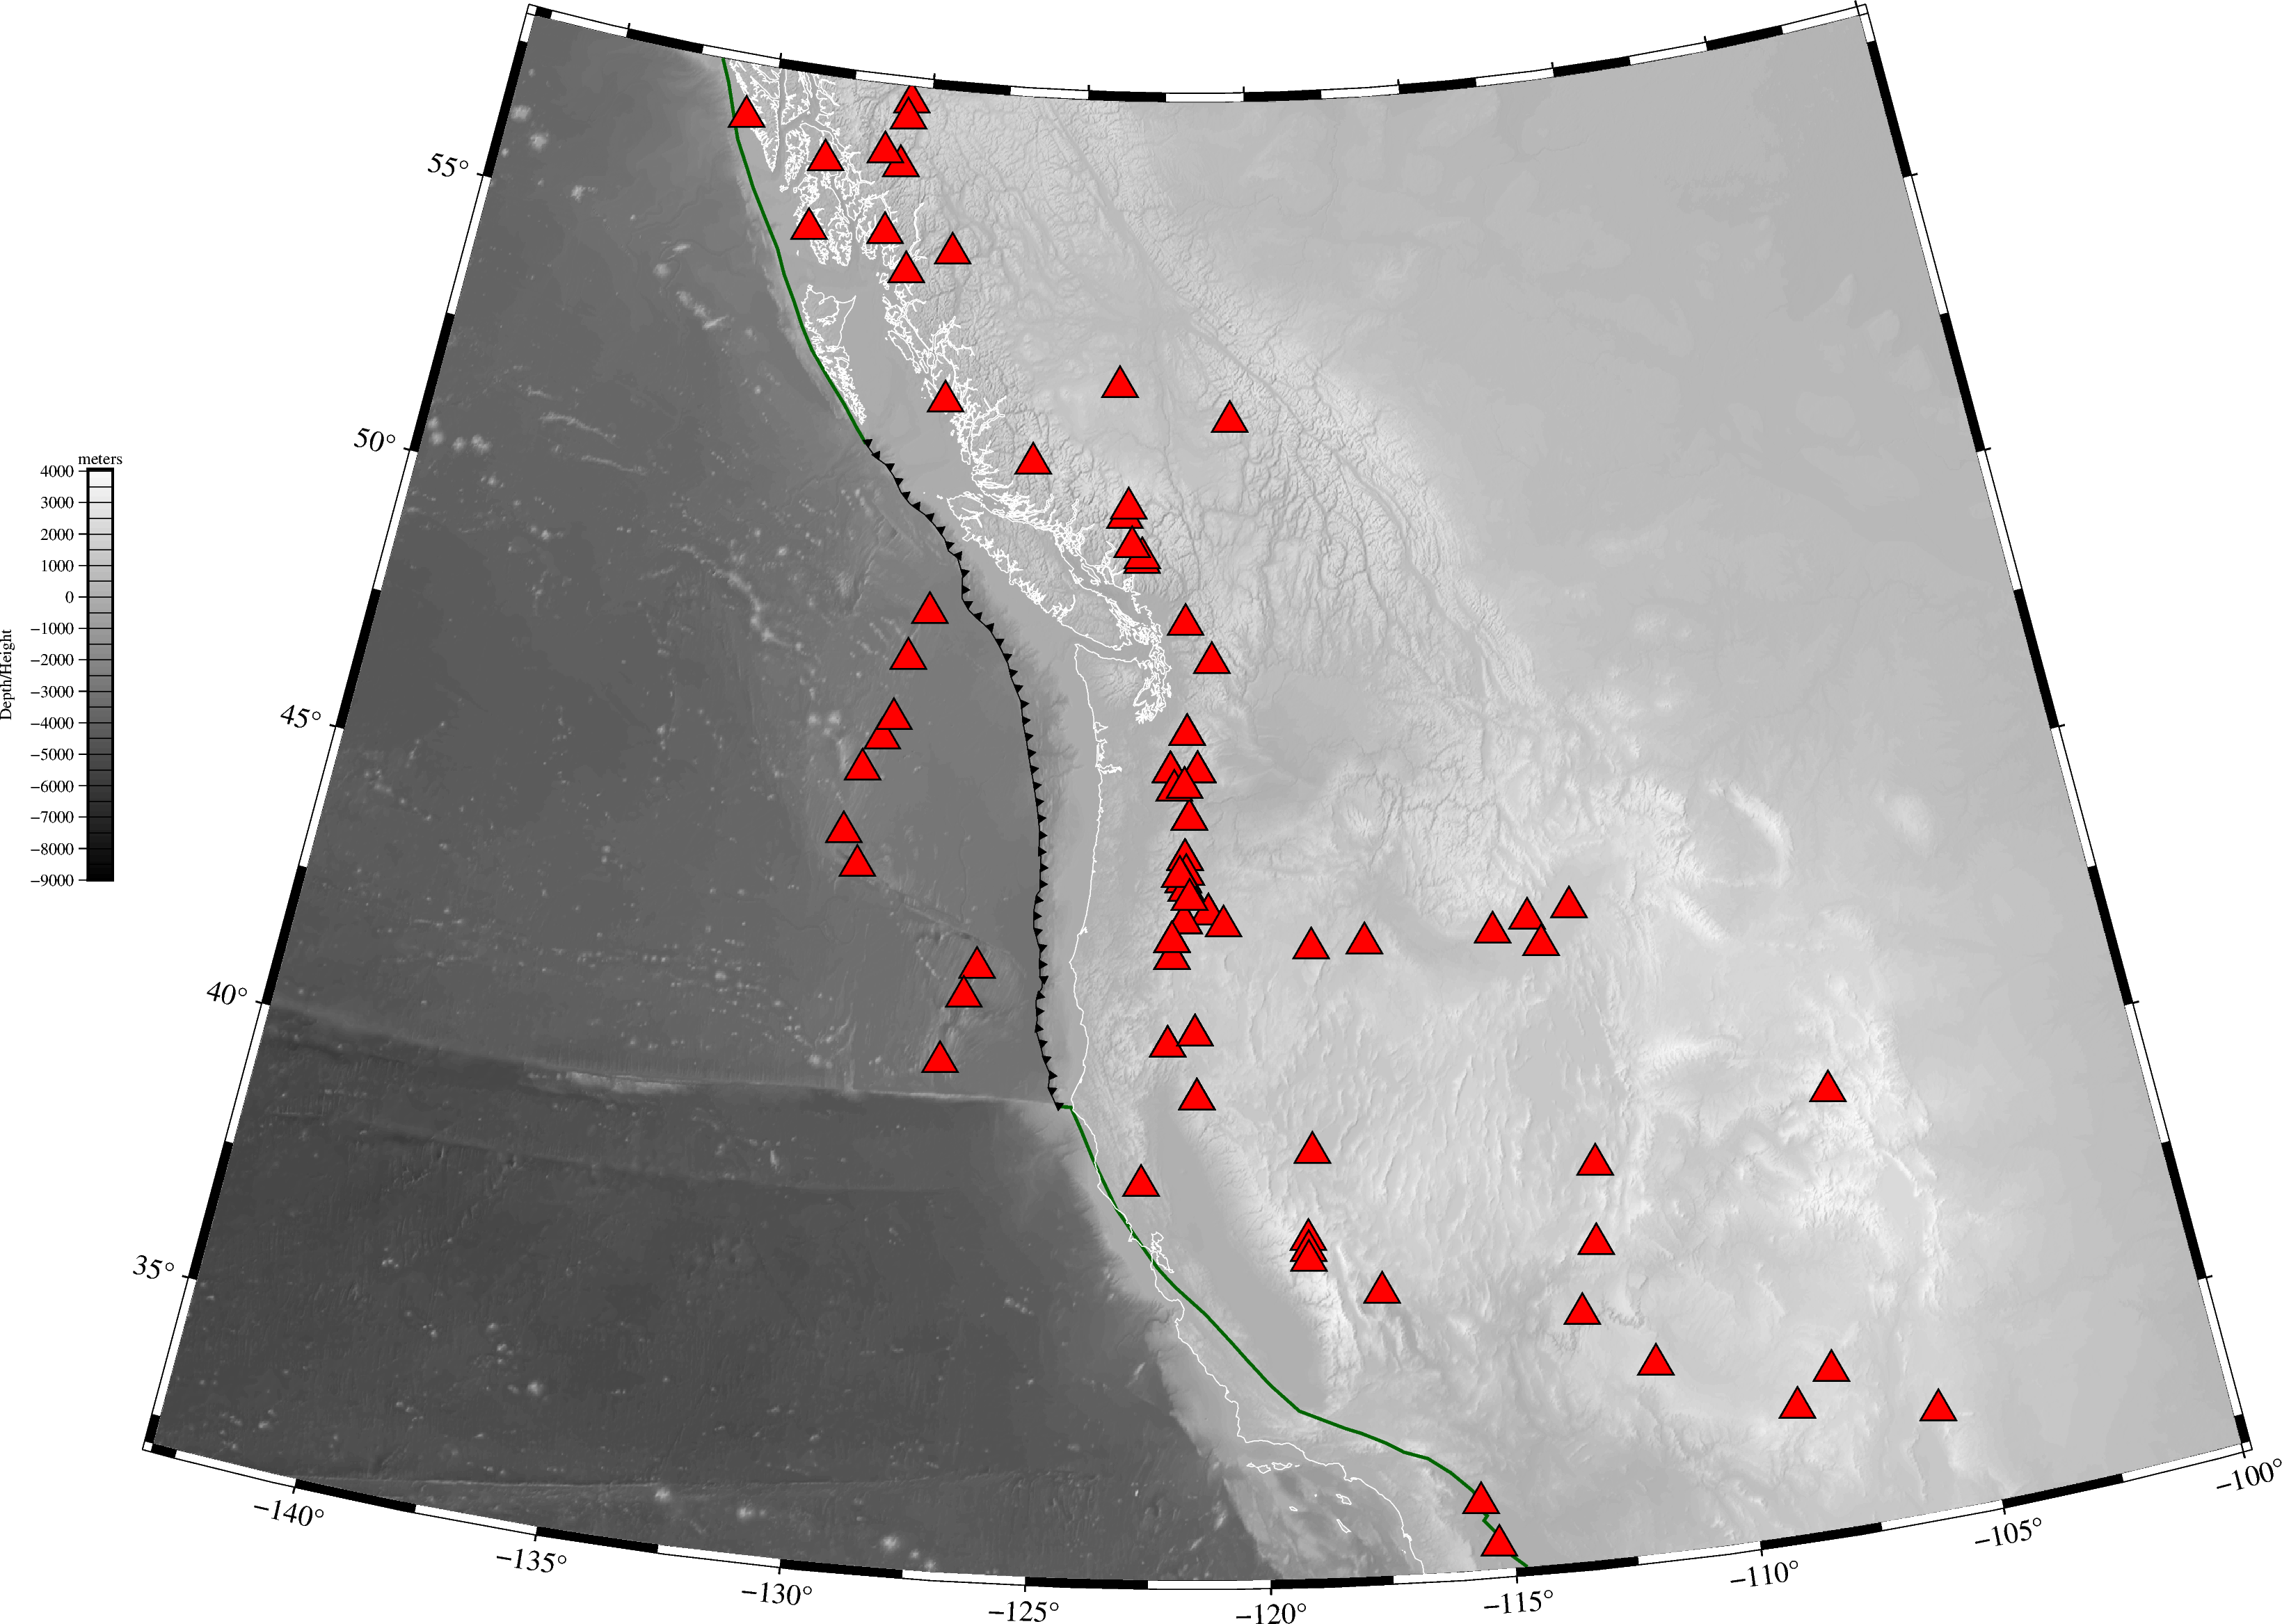

In [26]:
# filter for volcanoes in the bounding box
volcanoes_bbox = volcanoes.cx[west:east, south:north]

# alternatively, filter for volcanoes in a region
# volcanoes_subregion = volcanoes.loc[volcanoes.Subregion == 'High Cascades Volcanic Arc']

# plot the volcanoes that are in the bounding box
for _, row in volcanoes_bbox.iterrows():
    fig.plot(x=row['geometry'].x, y=row['geometry'].y, style="t0.5c", pen="0.5p,black", fill="red")

fig.show()